## Understanding Username and Password Choice ##

###### Imports ######

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import re
import operator
import string
import time
import enchant
import sys
from optparse import OptionParser, OptionGroup


Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set_style('white')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams["patch.force_edgecolor"] = True
firewater = {'username':'#F08030', 'password':'#6890F0'}
red_pal = sns.cubehelix_palette(10, start = .7, rot = .25, gamma = .9, hue = 1, light = .9, dark = .1)
blu_pal = sns.cubehelix_palette(10, start = 3, rot = -.25, gamma = .6, hue = 1, light = .9, dark = .1)

###### Read 10-million combinations file ######

In [4]:
filename = '10-million-combos.txt'  
df = pd.read_csv(filename, encoding = 'UTF-8', header = None, delimiter = '\t')
df.columns = ['username', 'password']
df.head()

,username,password
0,0000,00000000
1,0000,00001
2,0000,00001111
3,0000,000099
4,0000,00009999


In [5]:
df.describe()

,username,password
count,9998906,9997945
unique,8295406,5189393
top,info,123456
freq,2971,55893


In [6]:
user = df.username
user_len = user.str.len()
user_len = user_len.dropna()

pw = df.password
pw_len = pw.str.len()
pw_len = pw_len.dropna()

print(user.describe(), pw.describe())

count     9998906
unique    8295406
top          info
freq         2971
Name: username, dtype: object count     9997945
unique    5189393
top        123456
freq        55893
Name: password, dtype: object


In [7]:
len_df = pd.DataFrame(columns = df.columns)
len_df.username = user_len
len_df.password = pw_len

We can visualize the distribution of the username and password character lengths in a histogram 

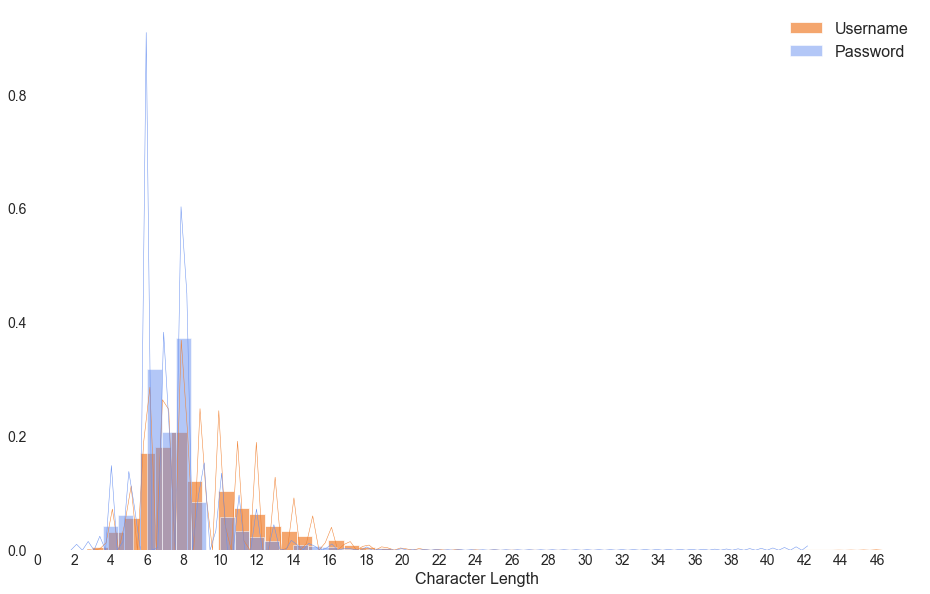

In [8]:
_ = sns.distplot(user_len, label = 'Username', kde = True,
             hist_kws = {'edgecolor' : 'w', 'linewidth' : 1, 'alpha': 0.7},
             kde_kws = {'linewidth' : 0.5}, color = '#F08030')
_ = sns.distplot(pw_len, label = 'Password', kde = True,
             hist_kws = {'edgecolor' : 'w', 'linewidth' : 1, 'alpha': 0.5},
             kde_kws = {'linewidth' : 0.5}, color = '#6890F0')

legend(markerscale = 16, fontsize = 16)
sns.despine(left = True, bottom = True)
_ = xlabel('Character Length', fontsize = 16)
_ = xticks(np.arange(0, 48, 2.0), fontsize = 14)
_ = yticks(fontsize = 14)

... or in violin plots.

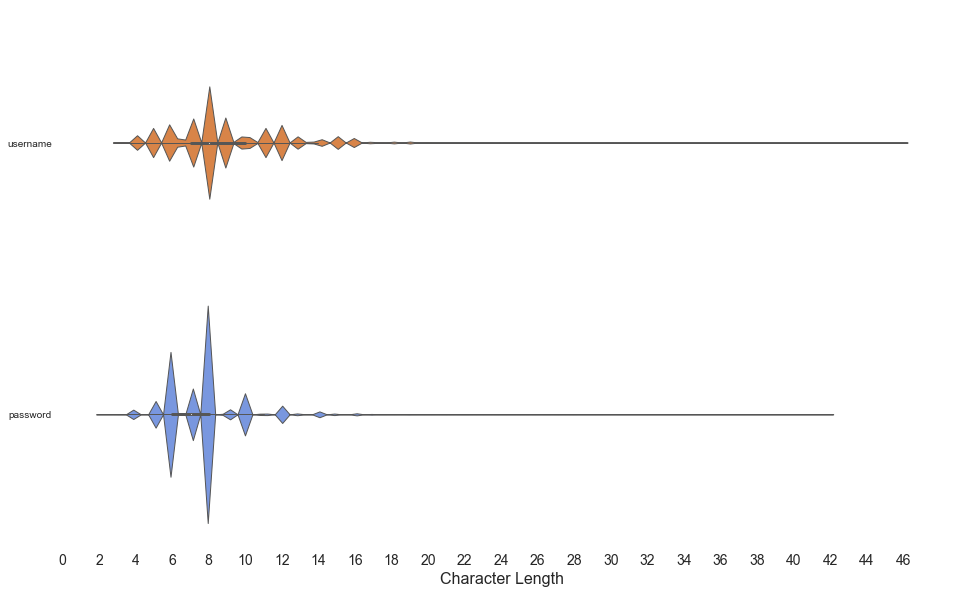

In [9]:
_ = sns.violinplot(data = len_df, scale = 'area', split = True, orient = 'h', linewidth = 1, palette = firewater)
sns.despine(left = True, bottom = True)
_ = xlabel('Character Length', fontsize = 16)
_ = xticks(np.arange(0, 48, 2.0), fontsize = 14)

Next, let's identify the 50 most used username and passwords in this combination data set.

In [10]:
top_pw = pw.value_counts().head(50)
top_pw

123456        55893
password      19580
12345678      13582
qwerty        13137
123456789     11696
12345         10938
1234           6432
111111         5682
1234567        4796
dragon         3927
123123         3845
baseball       3565
abc123         3511
football       3494
monkey         3246
letmein        3118
696969         3050
shadow         2956
master         2931
666666         2905
qwertyuiop     2860
123321         2850
mustang        2804
1234567890     2797
michael        2736
654321         2665
pussy          2573
superman       2540
1qaz2wsx       2531
7777777        2480
fuckyou        2345
121212         2340
000000         2339
qazwsx         2315
123qwe         2296
killer         2221
trustno1       2213
jordan         2189
jennifer       2155
zxcvbnm        2085
asdfgh         2074
hunter         2045
buster         1967
soccer         1964
harley         1958
batman         1935
andrew         1923
tigger         1913
sunshine       1901
iloveyou       1893


In [11]:
top_user = user.value_counts().head(50)
top_user

info       2971
admin      2047
2000       1095
michael    1012
john        888
david       829
robert      793
chris       759
mike        722
dave        715
richard     712
123456      665
thomas      657
steve       647
mark        633
andrew      625
daniel      613
george      602
charlie     595
paul        595
dragon      593
james       590
qwerty      579
martin      574
master      567
pussy       562
mail        561
charles     558
bill        550
patrick     532
1234        525
peter       522
shadow      518
johnny      499
hunter      490
carlos      489
black       481
jason       473
tarrant     472
alex        465
brian       463
steven      462
scott       462
edward      441
12345       440
joseph      440
matthew     423
justin      423
natasha     416
hammer      411
Name: username, dtype: int64

'^\w*$'

In [12]:
usernames = df.username.tolist()
passwords = df.password.tolist()

In [15]:
def get_trailing_nums(match):
    m = re.search(r'^\d+$', match)
    return int(m.group()) if m else None

In [13]:
def lettersymbol(passes):
    tot = len(passes)
    number = 0
    isValid = False
    for item in passes:
        item = str(item)
        if(bool(re.search(r'\d',item)) == False):
            if(bool(re.search('[a-zA-Z]', item)) == True):
                if(item.isalpha() == False):
                    isValid = True
        if(isValid):
            number += 1
        isValid = False
    return number,tot

def letternumber(passes):
    tot = len(passes)
    number = 0
    isValid = False
    for item in passes:
        item = str(item)
        if(bool(re.search(r'\d',item)) == True):
            if(bool(re.search('[a-zA-Z]', item)) == True):
                if(item.isalnum() == True):
                    isValid = True
        if(isValid):
            number += 1
        isValid = False
    return number,tot

def numbersymbol(passes):
    tot = len(passes)
    number = 0
    isValid = False
    for item in passes:
        item = str(item)
        if(bool(re.search(r'\d',item)) == True):
            if(bool(re.search('[a-zA-Z]', item)) == False):
                if(item.isdigit() == False):
                    isValid = True
        if(isValid):
            number += 1
        isValid = False
    return number,tot

def symbol(passes):
    tot = len(passes)
    number = 0
    isValid = False
    for item in passes:
        item = str(item)
        if(bool(re.search(r'\d',item)) == False):
            if(bool(re.search('[a-zA-Z]', item)) == False):
                isValid = True
        if(isValid):
            number += 1
        isValid = False
    return number,tot

def letter(passes):
    tot = len(passes)
    number = 0
    isValid = False
    for item in passes:
        item = str(item)
        if(bool(re.search(r'\d',item)) == False):
            if(bool(re.search('[a-zA-Z]', item)) == True):
                if(item.isalpha() == True):
                    isValid = True
        if(isValid):
            number += 1
        isValid = False
    return number,tot

def number(passes):
    tot = len(passes)
    number = 0
    isValid = False
    for item in passes:
        item = str(item)
        if(bool(re.search(r'\d',item)) == True):
            if(bool(re.search('[a-zA-Z]', item)) == False):
                if(item.isdigit() == True):
                    isValid = True
        if(isValid):
            number += 1
        isValid = False
    return number,tot

def hasall(passes):
    tot = len(passes)
    number = 0
    isValid = False
    for item in passes:
        item = str(item)
        if(bool(re.search(r'\d',item)) == True):
            if(bool(re.search('[a-zA-Z]', item)) == True):
                if(item.isalnum() == False):
                    isValid = True
        if(isValid):
            number += 1
        isValid = False
    return number,tot

In [14]:
num, tot = lettersymbol(pw)
print("{0:.2f}% of Passwords contain a letter and a symbol, but no number".format(num/tot * 100))
num, tot = letternumber(pw)
print("{0:.2f}% of Passwords contain a letter and a Number, but no symbol".format(num/tot * 100))
num, tot = numbersymbol(pw)
print("{0:.2f}% of Passwords contain a symbol and a Number, but no letter".format(num/tot * 100))
num, tot = symbol(pw)
print("{0:.6f}% of Passwords contain only symbols".format(num/tot * 100))
num, tot = letter(pw)
print("{0:.2f}% of Passwords contain only letters".format(num/tot * 100))
num, tot = number(pw)
print("{0:.2f}% of Passwords contain only numbers".format(num/tot * 100))
num, tot = hasall(pw)
print("{0:.2f}% of Passwords contain all constraints".format(num/tot * 100))

0.48% of Passwords contain a letter and a symbol, but no number
36.67% of Passwords contain a letter and a Number, but no symbol
0.08% of Passwords contain a symbol and a Number, but no letter
0.006070% of Passwords contain only symbols
41.87% of Passwords contain only letters
20.35% of Passwords contain only numbers
0.53% of Passwords contain all constraints


In [ ]:
usize = size(user)
psize = size(pw)
user_info = np.empty(usize)
pw_info = np.empty(psize)

In [ ]:
for i in range(usize):
    trailing_num[i] = get_trailing_nums(str(usernames[i]))

trailing_num[trailing_num == 0.] = np.nan
username_trailnum = trailing_num[~np.isnan(trailing_num)]